In [61]:
# boilerplate cell for stuff that comes out of the box with R, probably
# copied from https://github.com/Azure/RNNForTimeSeriesForecasting, because I am new to this stuff
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as stats
import statsmodels.stats.api as sms
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_process import arma_generate_sample as arimasim
from statsmodels.tsa.ar_model import AR, ARResults
from glob import glob
from collections import UserDict
from IPython.display import Image, Markdown, display
from utils import Capturing
%matplotlib inline

# some kind soul ported a bunch of default R datasets (and more) into python, bless his soul
from pydataset import data as pdsd

pd.options.display.float_format = '{:,.4f}'.format
np.set_printoptions(precision=4)

Original:
```R
rm( list=ls( all = TRUE ) )
par(mfrow=c(3,1))
phi.1 = .6; phi.2 = .2; data.ts = arima.sim(n = 500, list(ar = c(phi.1, phi.2)))
plot(data.ts, main=
paste("Autoregressive Process with phi1=",phi.1," phi2=",phi.2) )
acf(data.ts, main="Autocorrelation Function")
acf(data.ts, type="partial", main="Partial Autocorrelation Function")
```

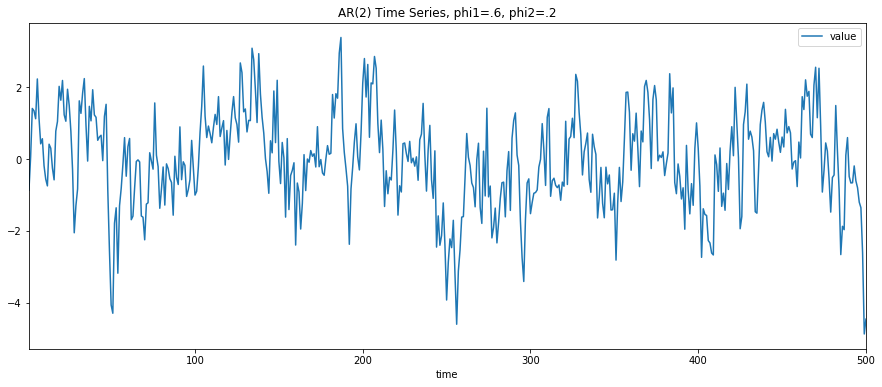

In [12]:
# if we import the data from R, the acf and pacf plots match, so these functions appear to work the same. we just
# don't generate the same simulation using Python for some reason
X = pd.read_csv("arsim1.csv")
X.plot(x="time", y="value", title="AR(2) Time Series, phi1=.6, phi2=.2",figsize=[15,6])

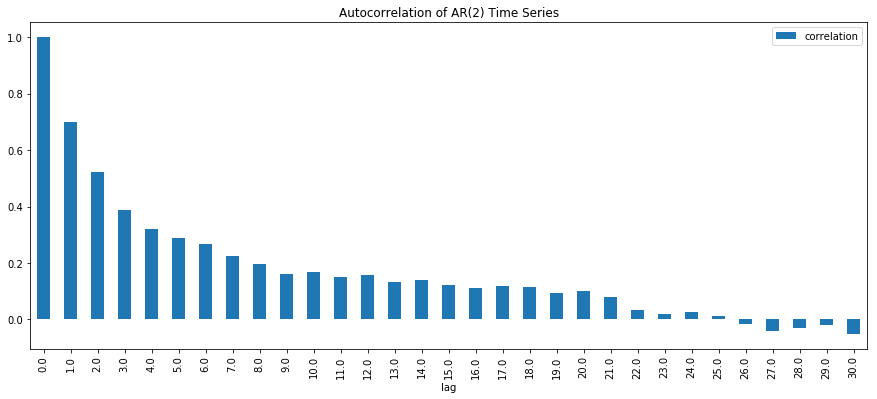

In [13]:
acfX = sts.acf(X['value'])
acfXframe = pd.DataFrame(np.array([np.array(range(len(acfX))),acfX]).T,columns=['lag','correlation'])
acfXframe[acfXframe["lag"]<=30].plot(x="lag",y="correlation",kind="bar",figsize=[15,6],title="Autocorrelation of AR(2) Time Series")

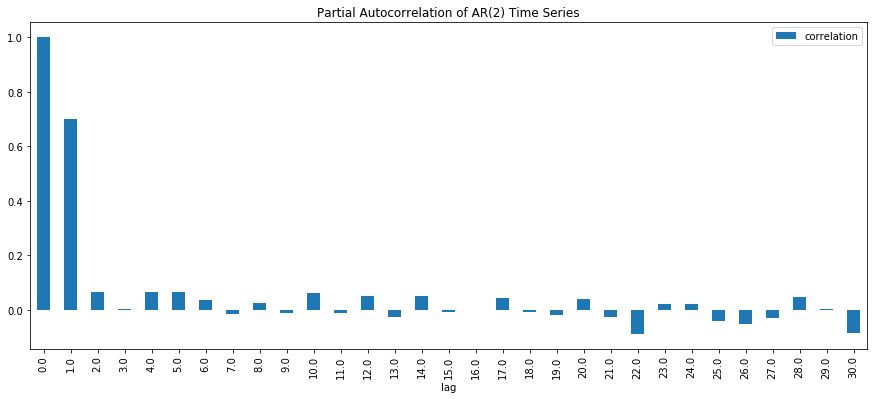

In [14]:
pacfX = sts.pacf(X['value'])
pacfXframe = pd.DataFrame(np.array([np.array(range(len(pacfX))),pacfX]).T,columns=['lag','correlation'])
pacfXframe[pacfXframe["lag"]<=30].plot(x="lag",y="correlation",kind="bar",figsize=[15,6],title="Partial Autocorrelation of AR(2) Time Series")

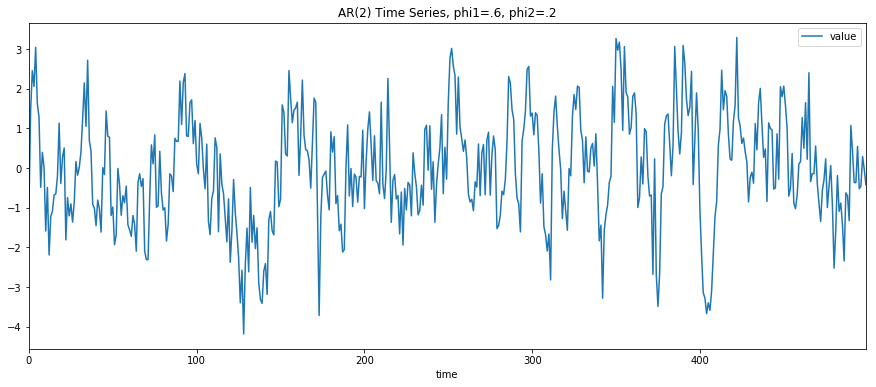

In [21]:
# Python simulated version
phi1, phi2 = -.6, -.2
X = arimasim(ar=[1,phi1,phi2],ma=[1],nsample=500)
X = pd.DataFrame(np.array([np.array([i for i in range(len(X))]), X]).T, columns=["time","value"])
X.plot(x="time", y="value", title="AR(2) Time Series, phi1=.6, phi2=.2",figsize=[15,6])

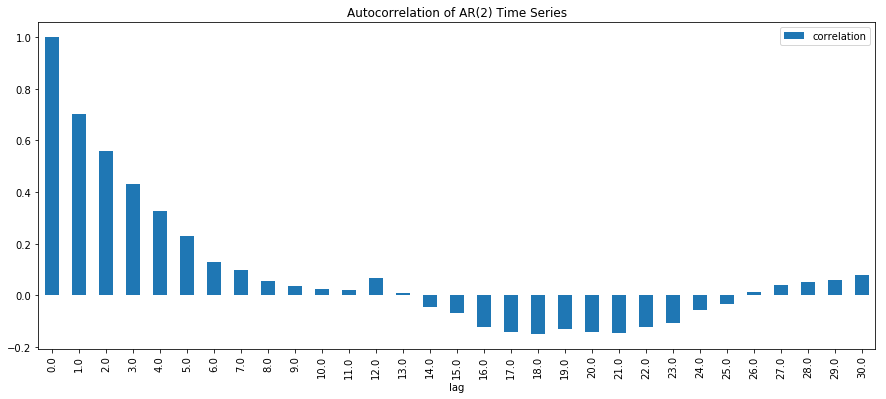

In [22]:
acfX = sts.acf(X['value'])
acfXframe = pd.DataFrame(np.array([np.array(range(len(acfX))),acfX]).T,columns=['lag','correlation'])
acfXframe[acfXframe["lag"]<=30].plot(x="lag",y="correlation",kind="bar",figsize=[15,6],title="Autocorrelation of AR(2) Time Series")

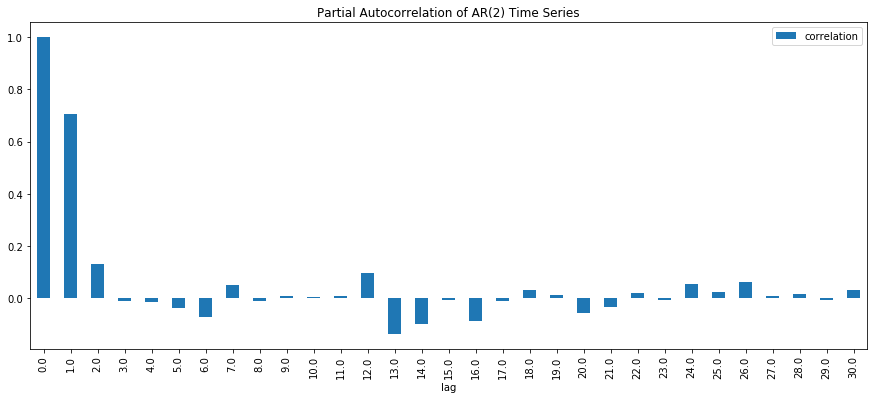

In [23]:
pacfX = sts.pacf(X['value'])
pacfXframe = pd.DataFrame(np.array([np.array(range(len(pacfX))),pacfX]).T,columns=['lag','correlation'])
pacfXframe[pacfXframe["lag"]<=30].plot(x="lag",y="correlation",kind="bar",figsize=[15,6],title="Partial Autocorrelation of AR(2) Time Series")

Original:
```R
phi.1 = .9; phi.2 = -.6; phi.3 = .3;
data.ts = arima.sim(n = 500, list(ar = c(phi.1, phi.2, phi.3)))
par(mfrow=c(3,1))
plot(data.ts, main= paste("Autoregressive Process with phi1=",
phi.1," phi2=",phi.2," phi3=",phi.3) )
acf(data.ts, main="Autocorrelation Function")
acf(data.ts, type="partial", main="Partial Autocorrelation Function")
```

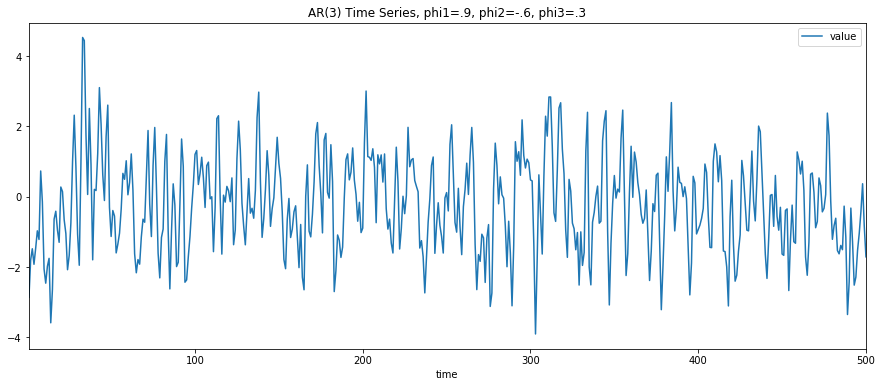

In [29]:
X = pd.read_csv("arsim2.csv")
X.plot(x="time", y="value", title="AR(3) Time Series, phi1=.9, phi2=-.6, phi3=.3",figsize=[15,6])

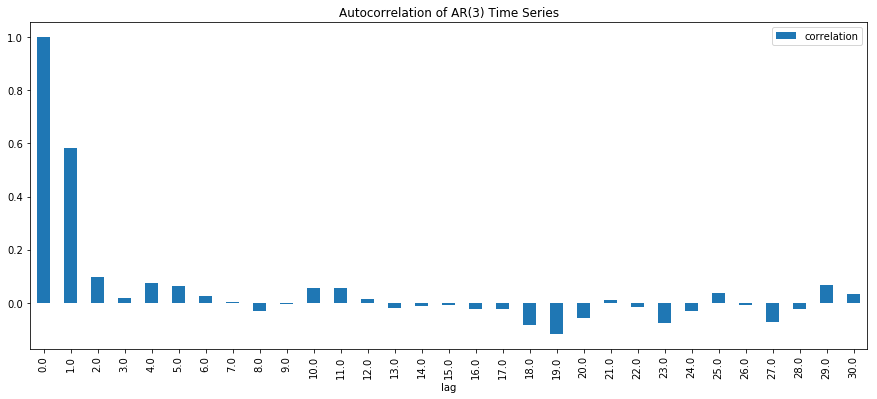

In [30]:
acfX = sts.acf(X['value'])
acfXframe = pd.DataFrame(np.array([np.array(range(len(acfX))),acfX]).T,columns=['lag','correlation'])
acfXframe[acfXframe["lag"]<=30].plot(x="lag",y="correlation",kind="bar",figsize=[15,6],title="Autocorrelation of AR(3) Time Series")

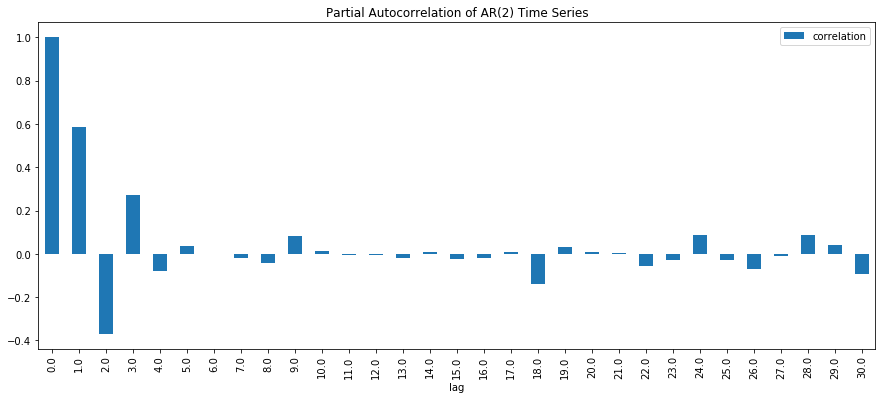

In [31]:
pacfX = sts.pacf(X['value'])
pacfXframe = pd.DataFrame(np.array([np.array(range(len(pacfX))),pacfX]).T,columns=['lag','correlation'])
pacfXframe[pacfXframe["lag"]<=30].plot(x="lag",y="correlation",kind="bar",figsize=[15,6],title="Partial Autocorrelation of AR(2) Time Series")

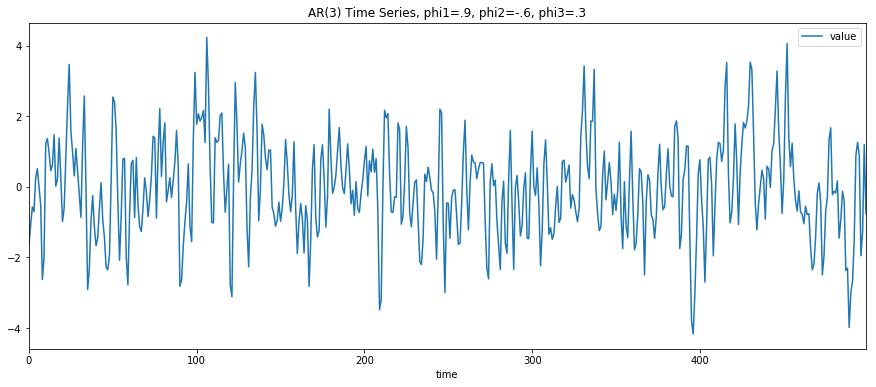

In [32]:
# Python sim
# Python simulated version
phi1, phi2, phi3 = -.9, .6, -.3
X = arimasim(ar=[1,phi1,phi2,phi3],ma=[1],nsample=500)
X = pd.DataFrame(np.array([np.array([i for i in range(len(X))]), X]).T, columns=["time","value"])
X.plot(x="time", y="value", title="AR(3) Time Series, phi1=.9, phi2=-.6, phi3=.3",figsize=[15,6])

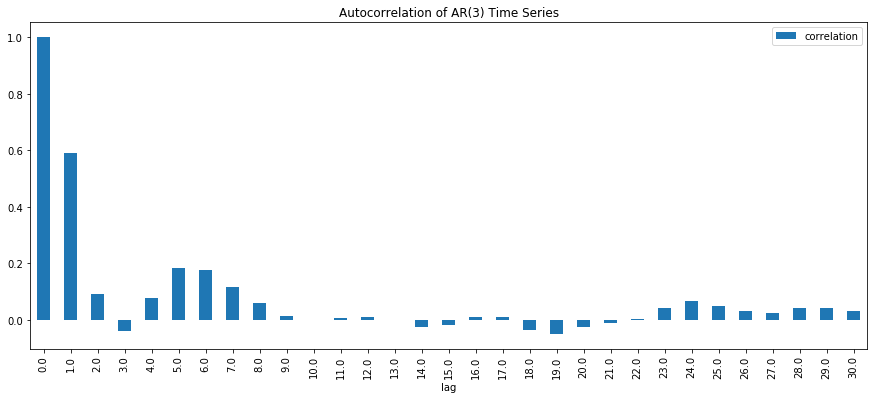

In [33]:
acfX = sts.acf(X['value'])
acfXframe = pd.DataFrame(np.array([np.array(range(len(acfX))),acfX]).T,columns=['lag','correlation'])
acfXframe[acfXframe["lag"]<=30].plot(x="lag",y="correlation",kind="bar",figsize=[15,6],title="Autocorrelation of AR(3) Time Series")

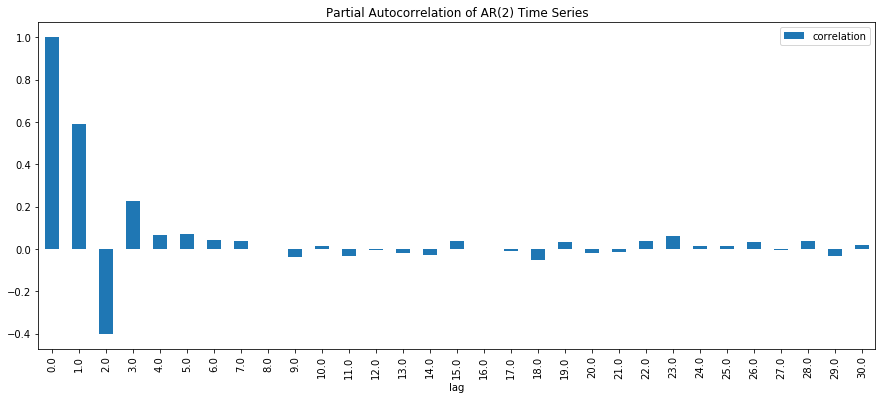

In [34]:
pacfX = sts.pacf(X['value'])
pacfXframe = pd.DataFrame(np.array([np.array(range(len(pacfX))),pacfX]).T,columns=['lag','correlation'])
pacfXframe[pacfXframe["lag"]<=30].plot(x="lag",y="correlation",kind="bar",figsize=[15,6],title="Partial Autocorrelation of AR(2) Time Series")

### Observation
It seems that the AR(3) simulation more closely matches what R output. Go figure.

**Note** skipping the beveridge data cos importing seems a bit of a hassle. Instead we just duplicate the `ar` part on our simulated data so that we learn how to estimate `p` in Python.

Original:
```R
ar(na.omit(Y), order.max = 5)
```

In [75]:
X = pd.read_csv("arsim2.csv")
model = AR(X['value'])
fitted = model.fit(5)

In [81]:
fitted.params

const      -0.0888
L1.value    0.9251
L2.value   -0.6509
L3.value    0.3660
L4.value   -0.1133
L5.value    0.0363
dtype: float64

The params are close but not identical to those in R. Oh well.